In [12]:
# Design of a Parabolic Nozzle for HALE Rocket 
# Optimization of Final Altitude, Staying [Above] [Below] 2nd Critical Point
# Assume isentropic flow between normal shocks: all losses in nozzle occure across the normal shock

# Author: Jacob van de Lindt 
# August 2019

In [51]:
# Imports and Definitions of constants and knows 

# Imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Constants 
k = 1.226 # Cp/Cv for HALE Kerosene/Oxygen Mixture Ratio
Rbar = 8314 # [J/K-mol]
R = 389.4145 # [J/kgK] for the fuel/oxidizer mixture
R_air = 287.05287 # [J/kgK] for dry air
g_c = 1 # [m/s^2]
g_0 = 9.81 # [m/s^2]

# Knowns 
m_dot = 3.5017  # mass flow rate, [kg/s]. Assumed constant

# Knowns at station 1, inside combustion chamber 
M_1 = 0
T_1 = 3600 # [K] adiabatic flame temperature 
P_1 = 2.413e6 # [Pa] chamber pressure 
D_1 = 0.1397 # [m] The combustion chamber diameter 
A_1 = (1/4)*np.pi*D_1**2 # [m^2]
# Define first stagnation conditions (from combustion chamber to shock) as station 1 knowns 
T_t1 = T_1
P_t1 = P_1

In [58]:
# Define environment conditions at altitude 
def g_grav(alt):
    # Takes an altitude in meters and returns the gravitation acceleration  
    G = 6.674*10**(-11) # m^3 / (kg s^2)
    M_earth = 5.972e24 # kg
    r_earth = 6371000 # km
    return G * M_earth / (alt + r_earth)**2 

def T_at_alt(alt):
    # Enter an altitude in [m] and it will output the temperature in [K] at this alt 
    alt_km = alt / 1000 # convert to [Km]
    # Use conditionals for lapse rates. 
    # Values from https://www.translatorscafe.com/unit-converter/en-US/calculator/altitude/
    
    if alt_km < 11:
        L_b = -6.5
        T_b = 288.15  # [K]
        alt_b = 0 # [km]
    elif alt_km < 20:
        L_b = 0
        T_b = 216.65  # [K]
        alt_b = 11 # [km]
    elif alt_km < 32:
        L_b = 1
        T_b = 216.65  # [K]
        alt_b = 20 # [km]
    elif alt_km < 47:
        L_b = 2.8
        T_b = 228.65  # [K]
        alt_b = 32 # [km]
    elif alt_km < 51:
        L_b = 0
        T_b = 270.65  # [K]
        alt_b = 47 # [km]
    elif alt_km < 71:
        L_b = -2.8
        T_b = 270.65  # [K]
        alt_b = 51 # [km]
    elif alt_km <= 84.9:
        L_b = -2
        T_b = 214.65 # [K]
        alt_b = 71 # [km]
    else:
        return('Error: Atmosphere Air Temp Not Valid Beyond 84.9 km')
    T_alt = T_b + L_b*(alt_km - alt_b)
    return T_alt 
# vectorize the function for use with numpy arrays  
v_T_at_alt = np.vectorize(T_at_alt)

def P_at_alt(alt):
# Enter an altitude in [m] and it will output the pressure in [Pa] at this alt 
    alt_km = alt / 1000 # convert to [Km]
    # Use conditionals for lapse rates. 
    # Values from https://www.translatorscafe.com/unit-converter/en-US/calculator/altitude/
    if alt_km < 11:
        L_b = -6.5
        T_b = 288.15  # [K]
        alt_b = 0 # [km]
        P_b = 101325 # [Pa]
    elif alt_km < 20:
        L_b = 0
        T_b = 216.65  # [K]
        alt_b = 11 # [km]
        P_b = 22632.06 # [Pa] 
    elif alt_km < 32:
        L_b = 1
        T_b = 216.65  # [K]
        alt_b = 20 # [km]
        P_b = 5474.889 # [Pa]
    elif alt_km < 47:
        L_b = 2.8
        T_b = 228.65  # [K]
        alt_b = 32 # [km]
        P_b = 868.0187 # [Pa]
    elif alt_km < 51:
        L_b = 0
        T_b = 270.65  # [K]
        alt_b = 47 # [km]
        P_b = 110.9063 # [Pa]
    elif alt_km < 71:
        L_b = -2.8
        T_b = 270.65  # [K]
        alt_b = 51 # [km]
        P_b = 66.93887 # [Pa]
    elif alt_km <= 84.9:
        L_b = -2
        T_b = 214.65 # [K]
        alt_b = 71 # [km]
        P_b = 3.956420 # [Pa]
    else:
        return('Error: Atmosphere Air Temp Not Valid Beyond 84.9 km')
    if L_b != 0:
        L_b_per_m = L_b / 1000 # convert to [K/m]
        base = T_b / v_T_at_alt(alt)
        exponant = g_0 / (R_air * L_b_per_m)
        P_alt = P_b * base**exponant
    else:
        exponant = (g_0 * (alt - alt_b*1000)) / (R_air * T_b)
        P_alt = P_b * np.exp(-exponant)
    return P_alt
    # Enter an altitude in [m] and it will return the pressure at this altitude in [Pa]
    # Can be used up to 86 Alt = Km. 
    
# vectorize the function for use with numpy arrays  
v_P_at_alt = np.vectorize(P_at_alt)    

def density_at_alt(alt):
    # Use existing pressure and temp functions along with eq of state for a perfect gas
    return v_P_at_alt(alt) / (R_air * v_T_at_alt(alt))

# vectorize the function for use with numpy arrays  
v_density_at_alt = np.vectorize(density_at_alt) 

<IPython.core.display.Javascript object>


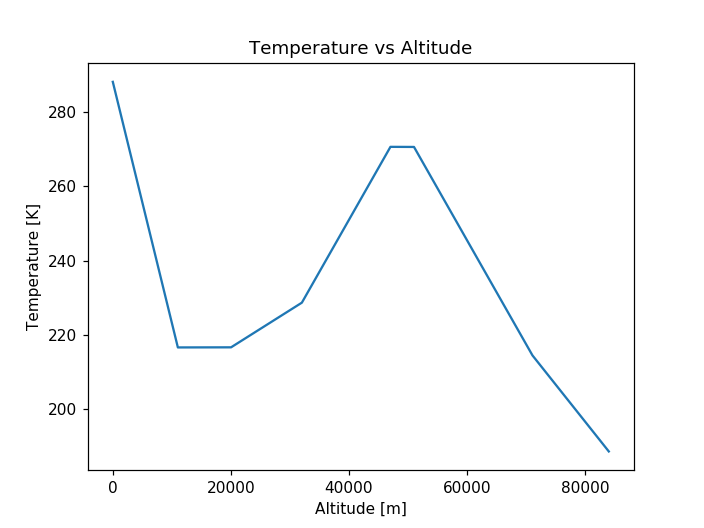

Text(0, 0.5, 'Temperature [K]')

In [56]:
tarray = np.arange(0, 84000, 1)
plt.plot(tarray, v_T_at_alt(tarray))
plt.title('Temperature vs Altitude')
plt.xlabel('Altitude [m]')
plt.ylabel('Temperature [K]')

<IPython.core.display.Javascript object>


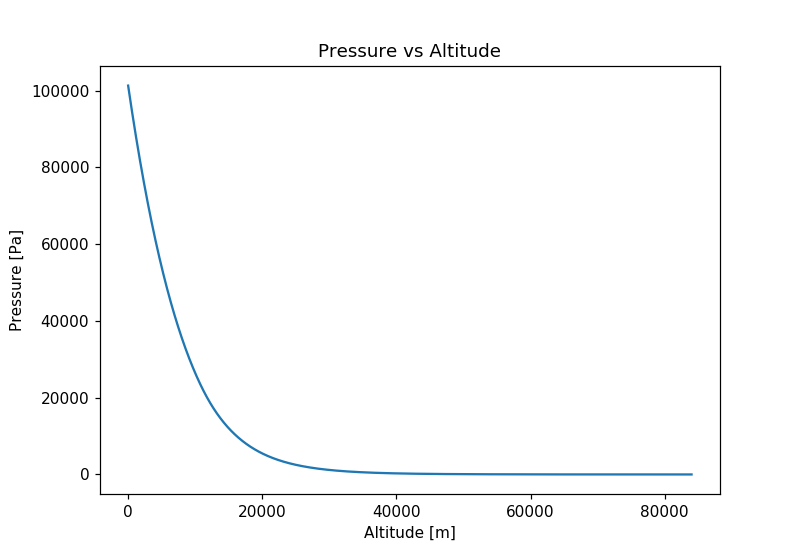

Text(0, 0.5, 'Pressure [Pa]')

In [55]:
plt.plot(tarray, v_P_at_alt(tarray))
plt.title('Pressure vs Altitude')
plt.xlabel('Altitude [m]')
plt.ylabel('Pressure [Pa]')

<IPython.core.display.Javascript object>


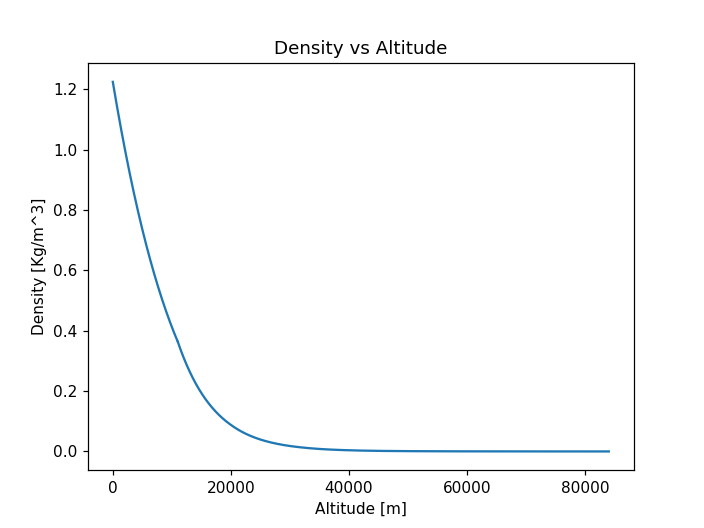

Text(0, 0.5, 'Density [Kg/m^3]')

In [67]:
plt.plot(tarray, v_density_at_alt(tarray))
plt.title('Density vs Altitude')
plt.xlabel('Altitude [m]')
plt.ylabel('Density [Kg/m^3]')